In [72]:
import pandas as pd
import numpy as np
import anndata as ad
import scanpy as sc
import h5py as h5
import glob
import os

paths = "/home/workspace/notebook/data/GSE166895_fetal_hematopoiesis"

glob.glob(os.path.join(paths, "*.csv.gz"))

['/home/workspace/notebook/data/GSE166895_fetal_hematopoiesis/GSE166895_preQC_ADTraw_FL-FBM-CB.csv.gz',
 '/home/workspace/notebook/data/GSE166895_fetal_hematopoiesis/GSE166895_Raw_ADT_CD34Sinu_FLFBM.csv.gz',
 '/home/workspace/notebook/data/GSE166895_fetal_hematopoiesis/GSE166895_postQC_mRNAraw_FL-FBM-CB.csv.gz',
 '/home/workspace/notebook/data/GSE166895_fetal_hematopoiesis/GSE166895_postQC_mRNAraw_FBM-MNCs.csv.gz',
 '/home/workspace/notebook/data/GSE166895_fetal_hematopoiesis/GSE166895_overlap_ADTonmRNAraw_FL-FBM-CB.csv.gz',
 '/home/workspace/notebook/data/GSE166895_fetal_hematopoiesis/GSE166895_preQC_ADTraw_FBM-MNCs.csv.gz',
 '/home/workspace/notebook/data/GSE166895_fetal_hematopoiesis/GSE166895_overlap_ADTonmRNA_DSBnormalised_FBM-MNCs.csv.gz',
 '/home/workspace/notebook/data/GSE166895_fetal_hematopoiesis/GSE166895_overlap_ADTonmRNADSBnormalised_FL-FBM-CB.csv.gz',
 '/home/workspace/notebook/data/GSE166895_fetal_hematopoiesis/GSE166895_preQC_mRNAraw_FL-FBM-CB.csv.gz',
 '/home/workspace

In [55]:
adata = ad.read_csv('/home/workspace/notebook/data/GSE166895_fetal_hematopoiesis/GSE166895_Raw_mRNA_CD34Sinu_FLFBM.csv.gz')

adata

AnnData object with n_obs × n_vars = 1577 × 24247

In [70]:
adata.var["mt"] = adata.var_names.str.startswith("MT-")
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
adata.var["ig"] = adata.var_names.str.startswith("IG")
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

In [74]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb", 'ig'], inplace=True, log1p=True
)

adata

AnnData object with n_obs × n_vars = 1577 × 24247
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'total_counts_ig', 'log1p_total_counts_ig', 'pct_counts_ig'
    var: 'mt', 'ribo', 'ig', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

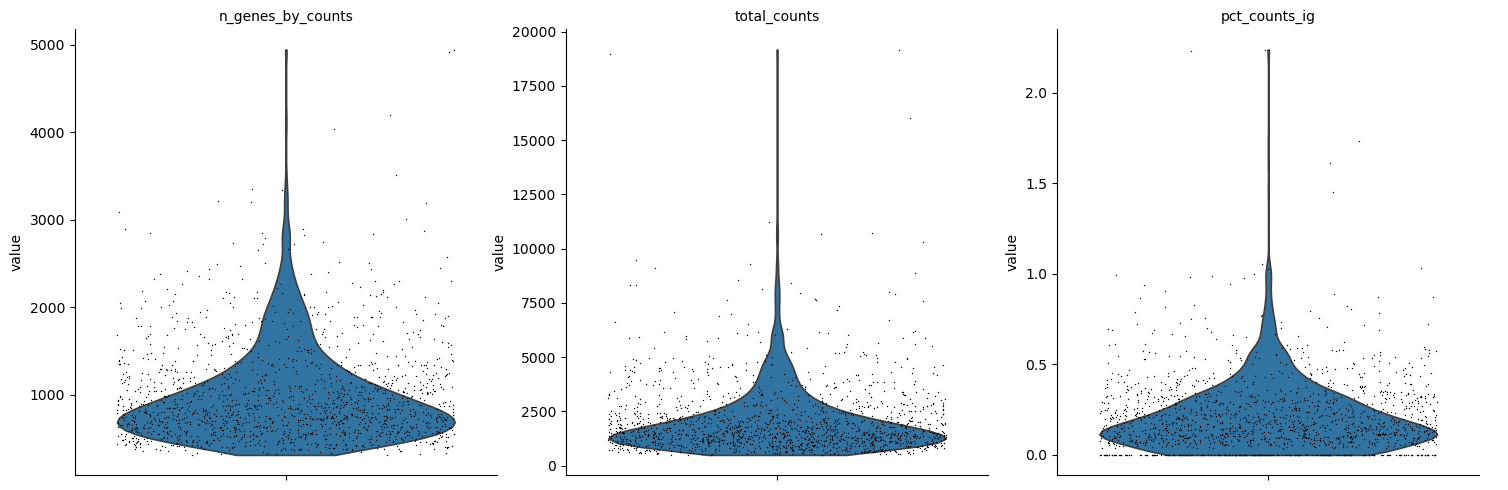

In [75]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_ig"],
    jitter=0.4,
    multi_panel=True,
)